In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr                      
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from datetime import date, time, datetime 
import pandas as pd 
import netCDF4 as net

# Import the File as a Dataset
filename = 'Sentinel3A_NRT_2019_2020.nc'
dataset = xr.open_dataset(filename)

In [2]:
def plot_alongtrack_data(dataset, data, title):
    # Determine Long and Lat
    lon = dataset['longitude']
    lat = dataset['latitude']

    # Determine Coordinates
    attributes = dataset.attrs
    x_min = attributes['longitude_min']
    x_max = attributes['longitude_max']
    y_min = attributes['latitude_min']
    y_max = attributes['latitude_max']
    
    # Set Figure Axis
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # define the map projection
    ax.set_extent([x_min, x_max, y_min, y_max], crs=ccrs.PlateCarree())
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False 
    
    # Plot Data
    plt.scatter(lon, lat, c=data, s=5, cmap = 'coolwarm')
    
    # Coastlines
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    
    # Colorbar
    plt.colorbar(shrink = 0.5)
    
    # Set Title
    plt.title(title)
    
    plt.show()

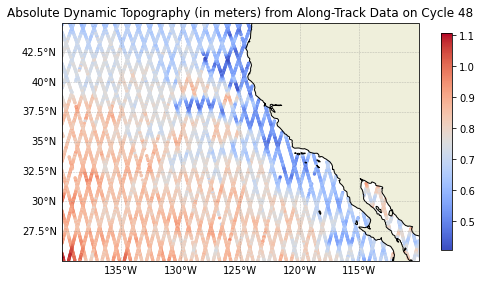

In [3]:
# Ground Tracks Plot
adt_data = dataset['adt']
adt_day_1 = adt_data[1, :, :]
title = 'Absolute Dynamic Topography (in meters) from Along-Track Data on Cycle 48'
plot_alongtrack_data(dataset, adt_day_1, title)

In [4]:
# Time Series Plot
def alongtrack_time_series(alongtrack_position, track_number):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot()
    plt.plot(adt_data[:, alongtrack_position, track_number])
    
    # Axis Labels
    x_axis = 'Absolute Dynamic Topography (in meters)'
    y_axis = 'Cycle Number'
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    
    # Title
    title = 'Absolute Dynamic Topography Time Series (in meters) from Alongtrack on Along-Track Position {a} and Track Number {b}'
    plt.title(title.format(a=alongtrack_position, b=track_number))
    plt.show()

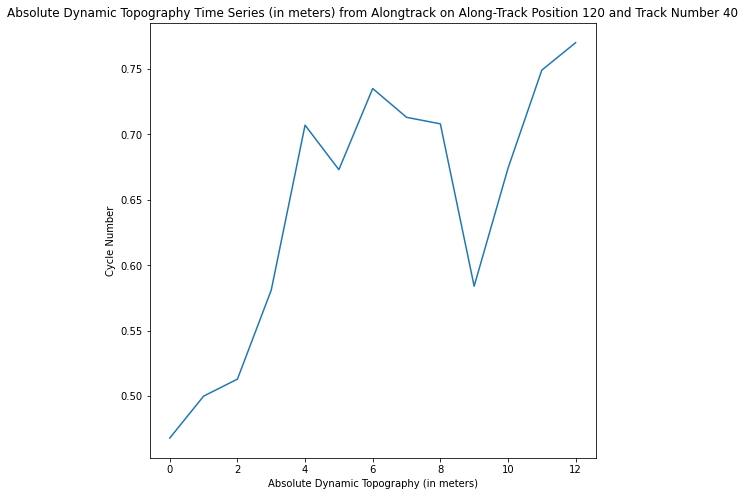

In [5]:
alongtrack_time_series(120, 40)